# Steering angle study

In [1]:
import carla 
import math 
import random 
import time 
import carla_helpers as helpers

# Connect to the client and get the world object
client = carla.Client('localhost', 2000) 
world = client.get_world() 

# load Town04 map
world = client.load_world('Town04')

# Get the blueprint library and the spawn points for the map
bp_lib = world.get_blueprint_library() 
spawn_points = world.get_map().get_spawn_points() 

# Get the blueprint for the bycicle you want
vehicle_bp = bp_lib.find('vehicle.tesla.model3') 
# nb other options are:
# 'vehicle.gazelle.omafiets',
# 'vehicle.diamondback.century'

# Try spawning the vehicle at a given spawn point
spn = 180
vehicle = world.try_spawn_actor(vehicle_bp, spawn_points[spn])

# start the simulation
# vehicle.set_autopilot(True) # not this time



## Place spectator

In [2]:
#print(spectator.get_location())
#transform = helpers.get_spectator_transform(world)
"""
Location(x=237.176086, y=-310.309143, z=1.558947)

=== Spectator Transform ===
Location: x=237.18, y=-310.31, z=1.56
Rotation: pitch=-12.70, yaw=133.12, roll=0.00
"""
#spectator.set_transform(transform)
transform = helpers.set_spectator_transform(world, (235.5, -309.1, 0.6), (-12.70, 133.12, 0))


=== Spectator Transform Set ===
Location: x=235.50, y=-309.10, z=0.60
Rotation: pitch=-12.70, yaw=133.12, roll=0.00


## Get maximum steering angle

In [3]:
def get_max_steering_angle(vehicle):
   wheel_phys_control = vehicle.get_physics_control().wheels
   max_angle = wheel_phys_control[0].max_steer_angle
   print(f"Maximum steering angle: {max_angle:.1f} degrees")
   return max_angle
   
   return max_angle

get_max_steering_angle(vehicle)

Maximum steering angle: 70.0 degrees


69.99999237060547

## Steer maximum left

In [4]:
control = vehicle.get_control()
control.steer = -1 # -70 degrees
vehicle.apply_control(control)

## Steer maximum right

In [5]:
control = vehicle.get_control()
control.steer = 1 # -70 degrees
vehicle.apply_control(control)

## Plot control vs steering angle

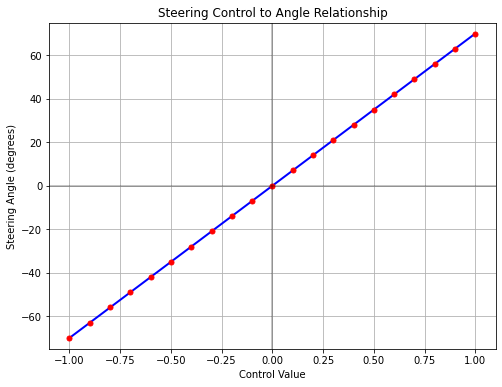

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_steering_relationship(vehicle):
   max_angle = vehicle.get_physics_control().wheels[0].max_steer_angle
   control_values = np.linspace(-1.0, 1.0, 21)
   angles = control_values * max_angle
   
   plt.figure(figsize=(8, 6))
   plt.plot(control_values, angles, 'b-', linewidth=2)
   plt.plot(control_values, angles, 'ro', markersize=5)
   
   plt.grid(True)
   plt.xlabel('Control Value')
   plt.ylabel('Steering Angle (degrees)')
   plt.title('Steering Control to Angle Relationship')
   
   plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
   plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
   
   plt.xlim(-1.1, 1.1)
   plt.ylim(-75, 75)
   
   plt.savefig('steering_relationship.png', dpi=300, bbox_inches='tight')
   plt.show()
   plt.close()

plot_steering_relationship(vehicle)

## Test full steering range

In [7]:
def test_steering_full_range(vehicle, debug=False):
   control = vehicle.get_control()
   
   # Increment from 0 to full left (-1.0)
   for steer in [x * -0.1 for x in range(11)]:
       control.steer = steer
       if debug:
           print(f"Steering angle: {control.steer:.1f}")
       vehicle.apply_control(control)
       time.sleep(0.2)
   
   # Increment from full left to full right (1.0)
   for steer in [x * 0.1 for x in range(-10, 11)]:
       control.steer = steer
       if debug:
           print(f"Steering angle: {control.steer:.1f}")
       vehicle.apply_control(control)
       time.sleep(0.2)
   
   # Increment from full right back to center (0.0)
   for steer in [x * 0.1 for x in range(10, -1, -1)]:
       control.steer = steer
       if debug:
           print(f"Steering angle: {control.steer:.1f}")
       vehicle.apply_control(control)
       time.sleep(0.1)

test_steering_full_range(vehicle, debug=True)

Steering angle: -0.0
Steering angle: -0.1
Steering angle: -0.2
Steering angle: -0.3
Steering angle: -0.4
Steering angle: -0.5
Steering angle: -0.6
Steering angle: -0.7
Steering angle: -0.8
Steering angle: -0.9
Steering angle: -1.0
Steering angle: -1.0
Steering angle: -0.9
Steering angle: -0.8
Steering angle: -0.7
Steering angle: -0.6
Steering angle: -0.5
Steering angle: -0.4
Steering angle: -0.3
Steering angle: -0.2
Steering angle: -0.1
Steering angle: 0.0
Steering angle: 0.1
Steering angle: 0.2
Steering angle: 0.3
Steering angle: 0.4
Steering angle: 0.5
Steering angle: 0.6
Steering angle: 0.7
Steering angle: 0.8
Steering angle: 0.9
Steering angle: 1.0
Steering angle: 1.0
Steering angle: 0.9
Steering angle: 0.8
Steering angle: 0.7
Steering angle: 0.6
Steering angle: 0.5
Steering angle: 0.4
Steering angle: 0.3
Steering angle: 0.2
Steering angle: 0.1
Steering angle: 0.0


## More steering study functions

In [8]:
def test_steering(vehicle, debug=False):
    control = vehicle.get_control()
    max_angle = vehicle.get_physics_control().wheels[0].max_steer_angle
    
    # Convert max steering angle to control value (-1 to 1)
    def angle_to_control(angle):
        return angle / max_angle
        
    # Test in 10 degree increments
    for angle in range(0, -int(max_angle)-1, -10):
        control.steer = angle_to_control(angle)
        if debug:
            print(f"Angle: {angle}°, Control: {control.steer:.2f}")
        vehicle.apply_control(control)
        time.sleep(0.2)

#test_steering(vehicle, debug=True)

def print_steering_range(vehicle):
   max_angle = vehicle.get_physics_control().wheels[0].max_steer_angle
   
   for control in [x/10 for x in range(-10, 11)]:
       angle = control * max_angle
       print(f"Control: {control:>5.1f}, Angle: {angle:>6.1f}°")       


# print_steering_range(vehicle)
       
def print_steering_range_latex(vehicle):
   max_angle = vehicle.get_physics_control().wheels[0].max_steer_angle
   
   print(r"\begin{table}[h]")
   print(r"\centering")
   print(r"\caption{Steering Control Values and Corresponding Angles}")
   print(r"\begin{tabular}{|c|c|}")
   print(r"\hline")
   print(r"Control Value & Steering Angle (degrees) \\")
   print(r"\hline")
   
   for control in [x/10 for x in range(-10, 11)]:
       angle = control * max_angle
       print(f"{control:>5.1f} & {angle:>6.1f} \\\\")
       print(r"\hline")
   
   print(r"\end{tabular}")
   print(r"\label{tab:steering_range}")
   print(r"\end{table}")       

# print_steering_range_latex(vehicle)   

: 

## Youtube video
https://youtu.be/cg6hhrpsc5g